## EE 461P: Data Science Principles  
### Term Project 
### Ensemble Tree Methods (Random Forests, XGBoost, AdaBoost, LightGBM, CatBoost)

# Data Preprocessing

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
%matplotlib inline

In [2]:
#Load dataset from csv file
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [3]:
label_encoder = LabelEncoder()
# one_hot_encoder = OneHotEncoder()

# df['type_encode'] = one_hot_encoder.fit_transform(df['type']) 
df['nameOrig_encode'] = label_encoder.fit_transform(df['nameOrig']) 
df['nameDest_encode'] = label_encoder.fit_transform(df['nameDest']) 
df.drop(columns=['nameOrig', 'nameDest'], inplace=True)

df = pd.get_dummies(df, prefix_sep="_", columns=['type'])
print(df.head())

   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  nameOrig_encode  nameDest_encode  \
0             0.0        0               0           757869          1662094   
1             0.0        0               0          2188998          1733924   
2             0.0        1               0          1002156           439685   
3             0.0        1               0          5828262           391696   
4             0.0        0               0          3445981           828919   

   type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0             0              0      

In [9]:
num_vars = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'nameOrig_encode', 'nameDest_encode']
min_max_scaler = MinMaxScaler()
df[num_vars] = min_max_scaler.fit_transform(df[num_vars])

print(df.head())

   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1  0.000106       0.002855        0.003233        0.000000   
1     1  0.000020       0.000357        0.000391        0.000000   
2     1  0.000002       0.000003        0.000000        0.000000   
3     1  0.000002       0.000003        0.000000        0.000059   
4     1  0.000126       0.000697        0.000603        0.000000   

   newbalanceDest  isFraud  isFlaggedFraud  nameOrig_encode  nameDest_encode  \
0             0.0        0               0         0.119287         0.610534   
1             0.0        0               0         0.344545         0.636919   
2             0.0        1               0         0.157738         0.161509   
3             0.0        1               0         0.917359         0.143881   
4             0.0        0               0         0.542392         0.304485   

   type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0             0              0      

In [10]:
X = df.drop('isFraud', 1)
y = df.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
print(X.head())

   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1  0.000106       0.002855        0.003233        0.000000   
1     1  0.000020       0.000357        0.000391        0.000000   
2     1  0.000002       0.000003        0.000000        0.000000   
3     1  0.000002       0.000003        0.000000        0.000059   
4     1  0.000126       0.000697        0.000603        0.000000   

   newbalanceDest  isFlaggedFraud  nameOrig_encode  nameDest_encode  \
0             0.0               0         0.119287         0.610534   
1             0.0               0         0.344545         0.636919   
2             0.0               0         0.157738         0.161509   
3             0.0               0         0.917359         0.143881   
4             0.0               0         0.542392         0.304485   

   type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0             0              0           0             1              0  
1             0 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.0min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.1s finished


Test AUC: 0.9969695906290363


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.2s finished


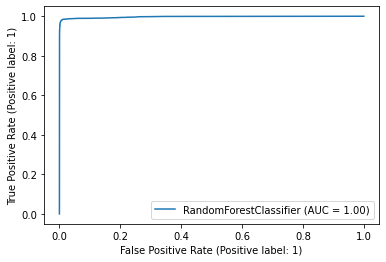

In [12]:
rfc = RandomForestClassifier(verbose=1, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)
print(f"Test AUC: {roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])}")
plot_roc_curve(rfc, X_test, y_test)

## Ignore everything below here for now

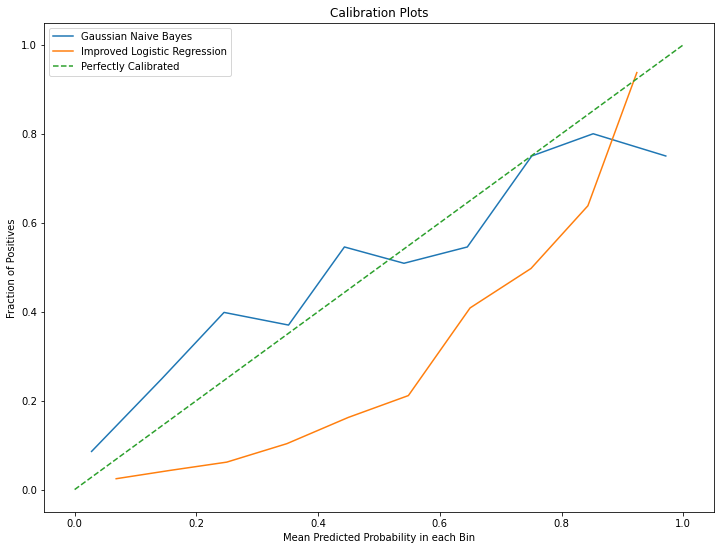

In [21]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(12, 9))

y_pred = gnb.predict_proba(X_test)[:,1]
prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10)
plt.plot(prob_pred, prob_true, label="Gaussian Naive Bayes")

y_pred = lr4_pipeline_v2.predict_proba(X_test)[:,1]
prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10)
plt.plot(prob_pred, prob_true, label="Improved Logistic Regression")

plt.plot([0, 1], [0, 1], linestyle='--', label="Perfectly Calibrated")

plt.ylabel("Fraction of Positives")
plt.xlabel("Mean Predicted Probability in each Bin")
plt.title("Calibration Plots")
plt.legend()

In [28]:
from sklearn.ensemble import AdaBoostClassifier

param_grid = {'n_estimators': [50, 100, 250, 500, 1000],
              'learning_rate': [0.01, 0.1, 0.3, 0.5]}

ada = GridSearchCV(AdaBoostClassifier(), param_grid, scoring='roc_auc', n_jobs=-1)
ada.fit(X_train, y_train)
print(ada.best_params_)

{'learning_rate': 0.01, 'n_estimators': 500}


AUC: 0.8337550186491816


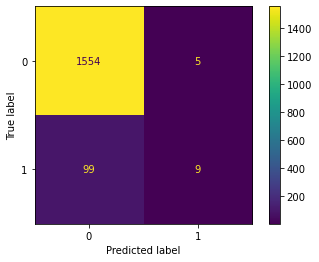

In [29]:
ada_opt = AdaBoostClassifier(n_estimators=500, learning_rate=0.01)
ada_opt.fit(X_train, y_train)
print(f"AUC: {roc_auc_score(y_test, ada_opt.predict_proba(X_test)[:,1])}")
plot_confusion_matrix(ada_opt, X_test, y_test)  
plt.show() 